In [1]:
from TextToSolver import TextToSolver
import numpy as np
import matplotlib.pyplot as plt

In [2]:
residual = ['-pKco2 + pH2CO3 - pPco2',
          '-pK1 + pHCO3 + pH - pH2CO3',
          '-pK2 + pCO3 + pH - pHCO3',
          '-pKw + pH + pOH',
          '-10 ** pCO2T + 10 ** pH2CO3 + 10 ** pHCO3 + 10 ** pCO3']

ind_vars = ['pH']
dep_vars = ['pPco2', 'pHCO3', 'pCO3', 'pH2CO3', 'pOH']
parameters = {'pKw': -14, 'pKco2': -1.46, 'pK1': -6.35,
                'pK2': -10.33, 'pCO2T': -3}

In [3]:
sys = TextToSolver(dep_vars, residual, indep_vars=ind_vars,
                    parameters=parameters)

In [4]:
options = {'TOL_FUN': 1e-10, 'TOL_X': 1e-12, 'MAX_ITER': 100}

n = 100
pH = np.linspace(-14, 0, n)
ind_var = {'pH': pH}

guess = {}
for var in dep_vars:
    guess[var] = np.ones(pH.shape)

In [5]:
solution, report = sys.solve(guess, indep_var_val=ind_var, input_options=options)

iter_count            res_norm         convergence          resip_cond           step_norm
------------------------------------------------------------------------------------------
0                     3.21e+02                 inf            2.50e-03                 inf
1                     3.18e+02            6.98e-03            2.50e-03            1.18e+02
2                     3.16e+02            7.19e-03            2.51e-03            1.17e+02
3                     3.14e+02            7.44e-03            2.50e-03            1.16e+02
4                     3.11e+02            7.69e-03            2.49e-03            1.15e+02
5                     3.09e+02            7.95e-03            2.47e-03            1.15e+02
6                     3.06e+02            8.19e-03            2.44e-03            1.15e+02
7                     3.04e+02            8.41e-03            2.42e-03            1.15e+02
8                     3.01e+02            8.61e-03            2.39e-03            1.14e+02

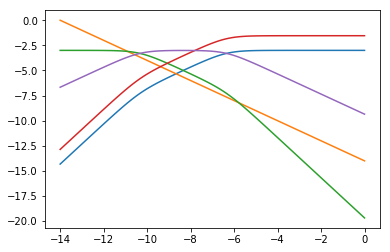

In [6]:
fig, ax = plt.subplots()
for var in solution:
    ax.plot(pH, solution[var])

plt.show()